# Section 1: Imports and Setup

In [1]:
# Section 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import yfinance as yf
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Plot style
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Configuration
start_date = "2023-01-01"
end_date = "2025-07-11"

# Section 2: Universe Selection and Data Download

Here we will download the Stocks, we will classify the stocks based on Large, Mid and Small Cap

In [2]:
it_stocks = [
    # Large / Mega‑caps (Nifty IT)
    'TCS.NS', 'INFY.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS',
    'LTIMINDTREE.NS', 'PERSISTENT.NS', 'COFORGE.NS',
    'MPHASIS.NS', 'OFSS.NS', 'ORACLEFN.NS', 'TATAELXSI.NS',
    'CYIENT.NS', 'KPITTECH.NS', 'NIITTECH.NS', 'ZENSAR.NS',
    'HEXAWARE.NS', 'BIRLASOFT.NS', 'SONATSOFTW.NS',

    # Additional Mid-caps
    'ECLERX.NS', 'INTELLECT.NS', 'NEWGEN.NS', 'AFFLE3I.NS',
    'ITCINFOTECH.NS', 'DATAMATICS.NS', 'CIGNITI.NS',
    'AXISCADES.NS', 'R_SYSTEMS.NS', 'ROUTEMOBIL.NS',
    'EMUDHRA.NS', 'HAPPMINDS.NS', 'MASTEK.NS', 'QUESSCORP.NS',
    'AZINDUST.NS', 'MAGELLANIC.NS', 'NAZARA.NS',

    # Small-caps & Emerging IT names
    '3IINFOTECH.NS', 'ALCHEMINT.NS', 'APPSOCIETY.NS',
    'ARROWGREEN.NS', 'BEXIND.NS', 'BRNIND.NS', 'CIPHER.NS',
    'CITIZENINF.NS', 'COMPUAGE.NS', 'CORALFINAC.NS',
    'CSSP.NS', 'DATAJET.NS', 'DEVINFOY.NS', 'DIGITAL.NS',
    'ELECON.NS', 'EXCELINFO.NS', 'GLOBTECH.NS', 'HCLINFOSYS.NS',
    'IDEAENG.NS', 'IGARASHI.NS', 'IMPPO.NS', 'INTLCROWN.NS',
    'IRISNFC.NS', 'LANCOIN.NS', 'LITMUS.NS', 'MATRIXCOM.NS',
    'MODINFONIK.NS', 'NIRAJFIN.NS', 'NRBHOUSING.NS', 'NVENEXT.NS',
    'OPTOCIRC.NS', 'PANACHE.NS', 'PANORAMIC.NS', 'PENTAMED.NS',
    'PRIMEURJA.NS', 'PRISMMEDIA.NS', 'PUNJABFIN.NS', 'RADIANT.NS',
    'RHIINFRA.NS', 'RLNVN.NS', 'SARLAPOLY.NS', 'SPLT.NS',
    'SRVINFRA.NS', 'SVCL.NS', 'TANLA.NS', 'TEJASNET.NS',
    'TRIL.NS', 'UNOMINDA.NS', 'VISTASPACE.NS', 'VTLS.NS',
    'WEIZITECH.NS', 'WINCENT.NS', 'WIPROINFRA.NS'
]

In [4]:
df_prices = yf.download(it_stocks, start=start_date, end=end_date)['Close']
df_prices.dropna(axis=1, how="all", inplace=True)
print(f"Data Shape: {df_prices.shape}")

[*********************100%***********************]  88 of 89 completed

59 Failed downloads:
['NRBHOUSING.NS', 'HCLINFOSYS.NS', 'MAGELLANIC.NS', 'RLNVN.NS', 'IRISNFC.NS', 'WEIZITECH.NS', 'LTIMINDTREE.NS', 'INTLCROWN.NS', 'TRIL.NS', 'ROUTEMOBIL.NS', 'HEXAWARE.NS', 'OPTOCIRC.NS', 'COMPUAGE.NS', 'VISTASPACE.NS', 'AFFLE3I.NS', 'CITIZENINF.NS', 'NVENEXT.NS', 'GLOBTECH.NS', 'NIITTECH.NS', 'BIRLASOFT.NS', 'ALCHEMINT.NS', 'QUESSCORP.NS', 'DATAJET.NS', 'PANORAMIC.NS', 'RADIANT.NS', 'CIPHER.NS', 'PRIMEURJA.NS', 'ORACLEFN.NS', 'SPLT.NS', 'VTLS.NS', 'IMPPO.NS', 'AZINDUST.NS', 'WIPROINFRA.NS', 'APPSOCIETY.NS', 'LITMUS.NS', 'SVCL.NS', 'CSSP.NS', 'BRNIND.NS', 'PUNJABFIN.NS', 'SRVINFRA.NS', 'RHIINFRA.NS', 'NIRAJFIN.NS', 'HAPPMINDS.NS', 'IDEAENG.NS', 'ZENSAR.NS', 'PENTAMED.NS', 'ITCINFOTECH.NS', '3IINFOTECH.NS', 'MATRIXCOM.NS', 'PRISMMEDIA.NS', 'DEVINFOY.NS', 'WINCENT.NS', 'R_SYSTEMS.NS', 'MODINFONIK.NS', 'BEXIND.NS', 'DIGITAL.NS']: YFTzMissingError('possibly delisted; no timezone found')
['CIGNITI.NS'

Data Shape: (622, 30)


# Section 3: Correlation Analysis and Heatmap

Now based on the the stocks that are downloaded, we will make a correlation heatmap and we will choose stocks that have values higher than 0.69.

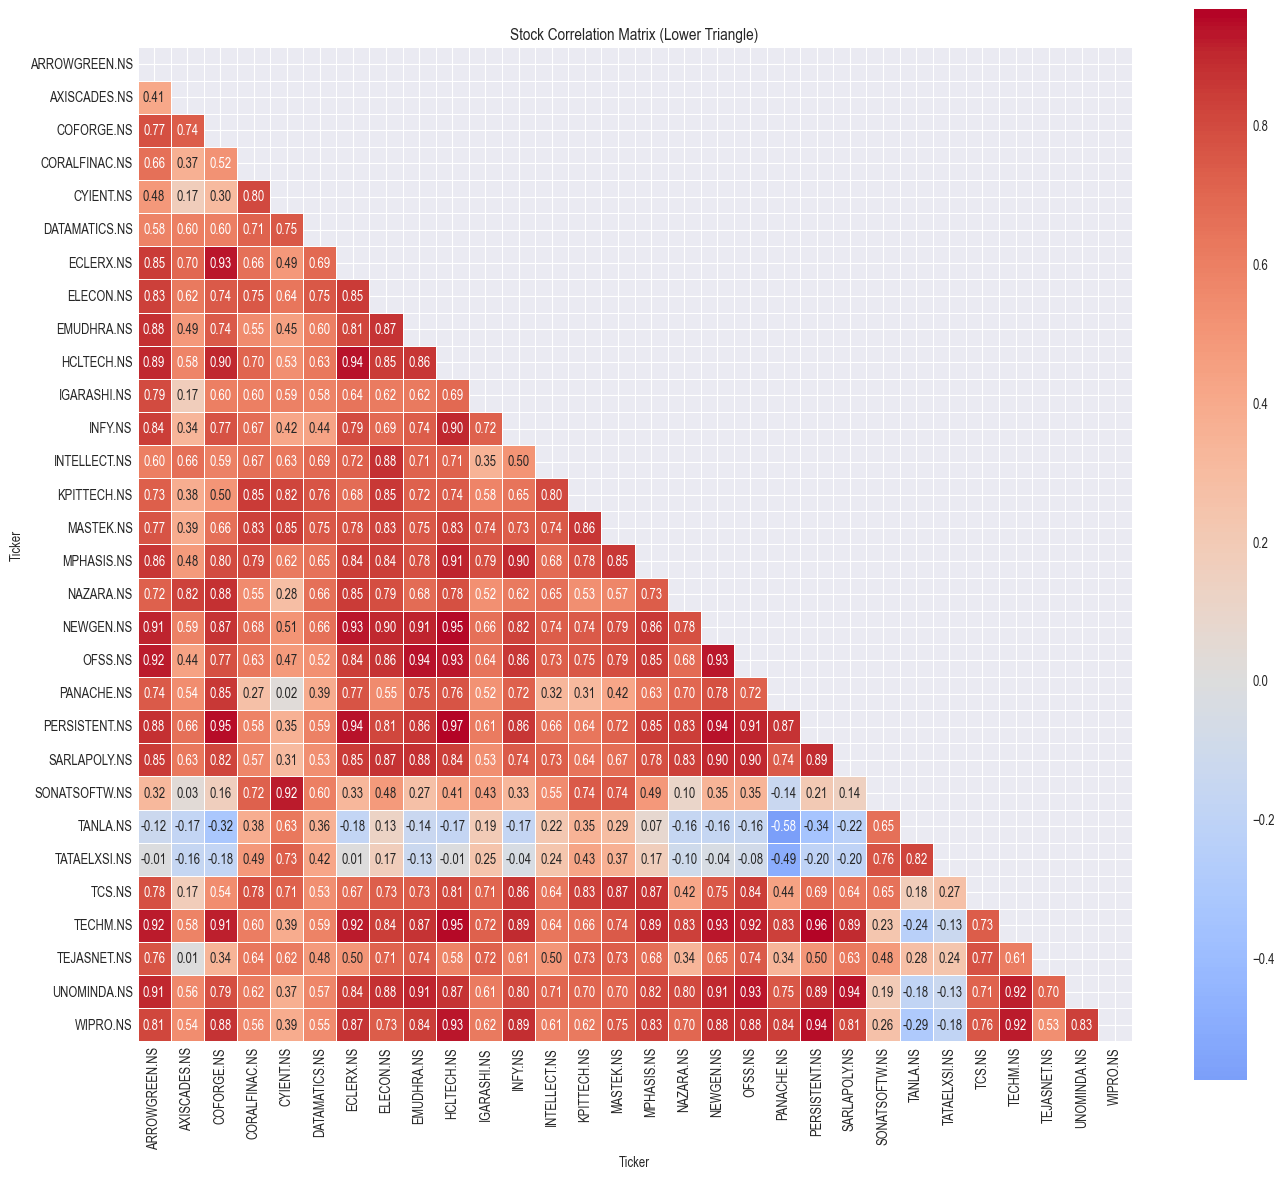

Highly correlated pairs (>0.8): 121
ARROWGREEN.NS - ECLERX.NS: 0.846
ARROWGREEN.NS - ELECON.NS: 0.833
ARROWGREEN.NS - EMUDHRA.NS: 0.881
ARROWGREEN.NS - HCLTECH.NS: 0.895
ARROWGREEN.NS - INFY.NS: 0.837
ARROWGREEN.NS - MPHASIS.NS: 0.858
ARROWGREEN.NS - NEWGEN.NS: 0.909
ARROWGREEN.NS - OFSS.NS: 0.919
ARROWGREEN.NS - PERSISTENT.NS: 0.877
ARROWGREEN.NS - SARLAPOLY.NS: 0.846
ARROWGREEN.NS - TECHM.NS: 0.919
ARROWGREEN.NS - UNOMINDA.NS: 0.906
ARROWGREEN.NS - WIPRO.NS: 0.813
AXISCADES.NS - NAZARA.NS: 0.825
COFORGE.NS - ECLERX.NS: 0.933
COFORGE.NS - HCLTECH.NS: 0.904
COFORGE.NS - NAZARA.NS: 0.877
COFORGE.NS - NEWGEN.NS: 0.873
COFORGE.NS - PANACHE.NS: 0.855
COFORGE.NS - PERSISTENT.NS: 0.948
COFORGE.NS - SARLAPOLY.NS: 0.816
COFORGE.NS - TECHM.NS: 0.913
COFORGE.NS - WIPRO.NS: 0.875
CORALFINAC.NS - CYIENT.NS: 0.802
CORALFINAC.NS - KPITTECH.NS: 0.847
CORALFINAC.NS - MASTEK.NS: 0.833
CYIENT.NS - KPITTECH.NS: 0.821
CYIENT.NS - MASTEK.NS: 0.845
CYIENT.NS - SONATSOFTW.NS: 0.924
ECLERX.NS - ELECON.NS: 0.8

In [14]:
# Compute correlation matrix
correlation_matrix = df_prices.corr()
correlation_Paramter = 0.8

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Stock Correlation Matrix (Lower Triangle)')
plt.tight_layout()
plt.show()

# Find highly correlated pairs (>f"{correlation_Paramter}")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if corr_val > correlation_Paramter:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print(f"Highly correlated pairs (>{correlation_Paramter}): {len(high_corr_pairs)}")
for pair in high_corr_pairs:  # Shows all pairs
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Section 4: Helper Functions for Analysis

In [15]:
# Section 4: Helper Functions for Analysis
def calculate_hedge_ratio(y, x):
    """Calculate hedge ratio using OLS regression"""
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit()
    return model.params[1]

def calculate_spread(y, x, hedge_ratio):
    """Calculate spread = y - beta * x"""
    return y - hedge_ratio * x

def adf_test(series):
    """Perform ADF test and return statistic and p-value"""
    result = adfuller(series, autolag='AIC')
    return result[0], result[1]

def calculate_half_life(spread):
    """Calculate half-life of mean reversion"""
    try:
        spread_lag = spread.shift(1)
        spread_diff = spread - spread_lag
        spread_lag = spread_lag.dropna()
        spread_diff = spread_diff.dropna()
        
        # Align the series
        aligned_data = pd.concat([spread_diff, spread_lag], axis=1).dropna()
        if len(aligned_data) < 10:
            return np.nan
            
        spread_diff = aligned_data.iloc[:, 0]
        spread_lag = aligned_data.iloc[:, 1]
        
        # Run regression: spread_diff = lambda * spread_lag + error
        x_with_const = sm.add_constant(spread_lag)
        model = sm.OLS(spread_diff, x_with_const).fit()
        lambda_coef = model.params[1]
        
        if lambda_coef >= 0:
            return np.nan
            
        half_life = -np.log(2) / lambda_coef
        return half_life if half_life > 0 else np.nan
    except:
        return np.nan

# Section 5: Pairs Testing Loop

The code systematically evaluates all possible stock pairs from the cleaned price data (df_prices) to identify statistically cointegrated pairs suitable for pairs trading strategies.

For each pair, it computes the following;
1. Hedge ratio using an OLS regression
2. Constructs the spread (y - βx)
3. Tests whether this spread is stationary using the Augmented Dickey-Fuller (ADF) test.

The idea is that if two stock prices move together in the long term, their spread should revert to a mean — a key requirement for statistical arbitrage.

Along with the ADF test, the code also calculates other useful metrics like; 
1. correlation
2. Mean
3. Standard deviation of the spread
4. Half-life of mean reversion (i.e., how quickly the spread reverts to its mean). 

All these metrics are stored in a results DataFrame, and any pair with an ADF p-value less than 0.05 is flagged as a valid cointegrated pair. This section helps filter out potentially profitable pairs from the entire universe for further backtesting and signal generation.

In [16]:
# Test all possible pairs (N choose 2)
stocks = list(df_prices.columns)
all_pairs = list(combinations(stocks, 2))

print(f"Testing {len(all_pairs)} pairs...")

results = []

for i, (stock_a, stock_b) in enumerate(all_pairs):
    if i % 20 == 0:
        print(f"Progress: {i}/{len(all_pairs)}")
    
    try:
        # Get price series
        y = df_prices[stock_a]
        x = df_prices[stock_b]
        
        # Calculate hedge ratio
        hedge_ratio = calculate_hedge_ratio(y, x)
        
        # Calculate spread
        spread = calculate_spread(y, x, hedge_ratio)
        
        # ADF test
        adf_stat, adf_pvalue = adf_test(spread)
        
        # Correlation
        correlation = correlation_matrix.loc[stock_a, stock_b]
        
        # Half-life
        half_life = calculate_half_life(spread)
        
        # Spread statistics
        spread_mean = spread.mean()
        spread_std = spread.std()
        
        # Check validity
        is_valid = adf_pvalue < 0.05
        
        results.append({
            'Stock_A': stock_a,
            'Stock_B': stock_b,
            'Hedge_Ratio': hedge_ratio,
            'ADF_Stat': adf_stat,
            'ADF_PValue': adf_pvalue,
            'Correlation': correlation,
            'Half_Life': half_life,
            'Spread_Mean': spread_mean,
            'Spread_Std': spread_std,
            'Valid': is_valid
        })
        
    except Exception as e:
        print(f"Error processing {stock_a}-{stock_b}: {e}")
        continue

# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"\nCompleted analysis of {len(results_df)} pairs")
print(f"Valid cointegrated pairs: {results_df['Valid'].sum()}")

Testing 435 pairs...
Progress: 0/435
Progress: 20/435
Progress: 40/435
Progress: 60/435
Progress: 80/435
Progress: 100/435
Progress: 120/435
Progress: 140/435
Progress: 160/435
Progress: 180/435
Progress: 200/435
Progress: 220/435
Progress: 240/435
Progress: 260/435
Progress: 280/435
Progress: 300/435
Progress: 320/435
Progress: 340/435
Progress: 360/435
Progress: 380/435
Progress: 400/435
Progress: 420/435

Completed analysis of 435 pairs
Valid cointegrated pairs: 67
